<a href="https://colab.research.google.com/github/AdithyaRai/Decision-Tree-Tennis-Predictor/blob/main/Decision_tree_tennis_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Information Gain Results ---
Information Gain for Outlook: 0.2467
Information Gain for Temperature : 0.0292
Information Gain for Humidity: 0.1518
Information Gain for Wind: 0.0481


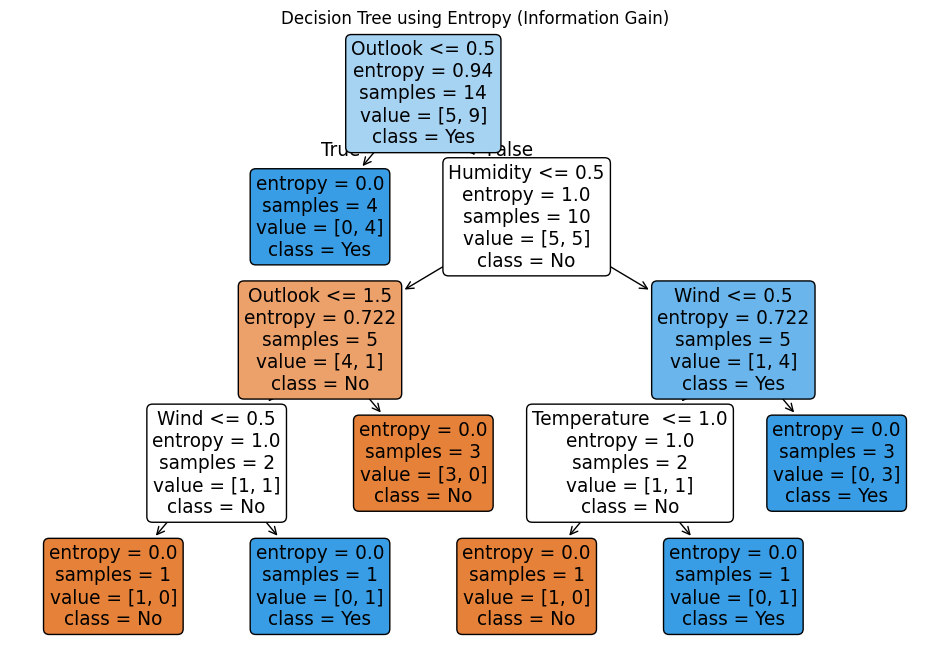

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
# Make sure the filename matches your saved CSV file
df = pd.read_csv('/content/drive/MyDrive/My_data2.csv')

# --- PART A: MANUAL ENTROPY & INFORMATION GAIN CALCULATION ---

def calculate_entropy(target_column):
    values, counts = np.unique(target_column, return_counts=True)
    entropy = -sum((counts[i]/sum(counts)) * np.log2(counts[i]/sum(counts)) for i in range(len(values)))
    return entropy

def calculate_information_gain(data, feature, target):
    # Total Entropy of the target
    total_entropy = calculate_entropy(data[target])

    # Weighted Entropy of the feature
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i]/sum(counts)) * calculate_entropy(data[data[feature] == values[i]][target])
                            for i in range(len(values)))

    return total_entropy - weighted_entropy

# Display Information Gain for each column
print("--- Information Gain Results ---")
target = 'Play_Tennis'
for col in df.columns:
    if col != target:
        ig = calculate_information_gain(df, col, target)
        print(f"Information Gain for {col}: {ig:.4f}")


# --- PART B: BUILDING THE VISUAL DECISION TREE ---

# Scikit-learn requires numbers, so we encode the text labels
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Initialize the classifier with 'entropy'
# This tells the computer to use Information Gain to build the tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True)

plt.title("Decision Tree using Entropy (Information Gain)")
plt.show()